<a href="https://colab.research.google.com/github/alihantutuk/.mat-to-.csv/blob/master/CV_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Computer Vision Homework 1 Report**

Mehmet Ali Han Tutuk
150160106

# In this assignment we are going implement video that have foreground cat image sequence in to backround image with effective python modules such as opencv and moviepy.

In [6]:

import numpy as np
import cv2
import moviepy.editor as mpy
import glob
from skimage import io
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In first part, I basically implemented cat image sequence into background image.**kalın metin**

In [4]:
#part1
path="/content/drive/My Drive/HW1_vision/cat"
cat_images=glob.glob(path+"/*.png")
background = cv2.imread("/content/drive/My Drive/HW1_vision/Malibu.jpg")
# b=io.imread("Malibu.jpg")
# io.imshow(background)

background_height = background.shape[0] 
background_width = background.shape[1] 
ratio = 360/background_height

background=cv2.resize(background,(int(background_width*ratio),360))
images_list=[]
for i in range (len(cat_images)):
    path2=path+ "/cat_{}.png".format(i)
    image = cv2.imread(path2)
    image_g_channel = image [ : , : , 1 ]
    image_r_channel = image [ : , : , 0 ]
    foreground = np.logical_or(image_g_channel < 180, image_r_channel > 150)   
    nonzero_x , nonzero_y = np.nonzero(foreground)
    nonzero_cat_values = image[nonzero_x, nonzero_y, : ]
    new_frame = background.copy()  
    new_frame[ nonzero_x , nonzero_y , : ] = nonzero_cat_values
    new_frame = new_frame[: ,: ,[2 ,1 ,0]]
    images_list.append(new_frame)

clip = mpy.ImageSequenceClip(images_list , fps = 25)
audio = mpy.AudioFileClip("/content/drive/My Drive/HW1_vision/selfcontrol_part.wav").set_duration(clip.duration )
clip = clip.set_audio(audioclip=audio) 
clip.write_videofile("/content/drive/My Drive/HW1_vision/part1_video.mp4" , codec="libx264")


[MoviePy] >>>> Building video /content/drive/My Drive/HW1_vision/part1_video.mp4
[MoviePy] Writing audio in part1_videoTEMP_MPY_wvf_snd.mp3


100%|██████████| 159/159 [00:01<00:00, 103.64it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/drive/My Drive/HW1_vision/part1_video.mp4



100%|██████████| 181/181 [00:03<00:00, 47.06it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/HW1_vision/part1_video.mp4 



**First** **frame** **output** **shown** **below**

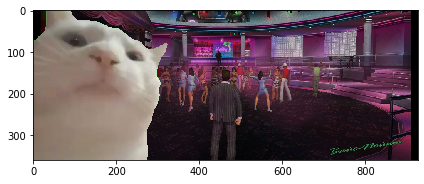

In [7]:
io.imshow(images_list[0])

**Background** image shown below.

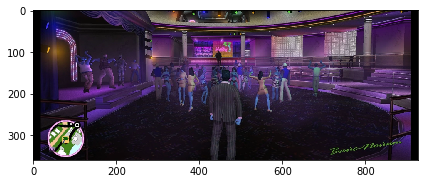

In [ ]:
io.imshow(background)

**In this part, in addition to part 1 I reflect the foreground image vertically and added to the image sequence into background image.**

In [8]:
#part2
images_list2=[]
for i in range (len(cat_images)):
    path2=path+ "/cat_{}.png".format(i)
    image = cv2.imread(path2)
    image_g_channel = image [ : , : , 1 ]
    image_r_channel = image [ : , : , 0 ]
    foreground = np.logical_or(image_g_channel < 180, image_r_channel > 150)   
    nonzero_x , nonzero_y = np.nonzero(foreground)
    nonzero_cat_values = image[nonzero_x, nonzero_y, : ]
    new_frame = background.copy()  
    new_frame[ nonzero_x , nonzero_y , : ] = nonzero_cat_values

    width=new_frame.shape[1]-1
    nonzero_y2= width-nonzero_y
    new_frame[ nonzero_x , nonzero_y2 , : ] = nonzero_cat_values

    new_frame = new_frame[: ,: ,[2 ,1 ,0]]
    images_list2.append(new_frame)
clip = mpy.ImageSequenceClip(images_list2 , fps = 25)
audio = mpy.AudioFileClip("/content/drive/My Drive/HW1_vision/selfcontrol_part.wav").set_duration(clip.duration )
clip = clip.set_audio(audioclip=audio) 
clip.write_videofile("/content/drive/My Drive/HW1_vision/part2_video.mp4" , codec="libx264")


[MoviePy] >>>> Building video /content/drive/My Drive/HW1_vision/part2_video.mp4
[MoviePy] Writing audio in part2_videoTEMP_MPY_wvf_snd.mp3


100%|██████████| 159/159 [00:00<00:00, 849.44it/s]

[MoviePy] Done.


[MoviePy] Writing video /content/drive/My Drive/HW1_vision/part2_video.mp4


100%|██████████| 181/181 [00:05<00:00, 31.60it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/HW1_vision/part2_video.mp4 



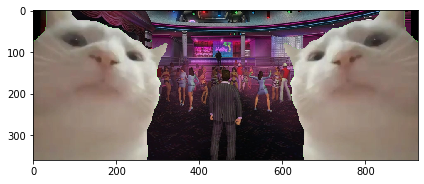

In [ ]:
io.imshow(images_list2[0])

**In this part, in addition the previous part i convert the rigth cat frame darker**

In [10]:
#part3
images_list3=[]
for i in range (len(cat_images)):
    path2=path+ "/cat_{}.png".format(i)
    image = cv2.imread(path2)
    image_g_channel = image [ : , : , 1 ]
    image_r_channel = image [ : , : , 0 ]
    foreground = np.logical_or(image_g_channel < 180, image_r_channel > 150)   
    nonzero_x , nonzero_y = np.nonzero(foreground)
    nonzero_cat_values = image[nonzero_x, nonzero_y, : ]
    new_frame = background.copy()  
    new_frame[ nonzero_x , nonzero_y , : ] = nonzero_cat_values

    width=new_frame.shape[1]-1
    nonzero_y2= width-nonzero_y
    darker=2.5 # may be change
    nonzero_cat_values = 255.0 * (nonzero_cat_values / 255.0)**darker
    new_frame[ nonzero_x , nonzero_y2 , : ] = np.uint8(nonzero_cat_values)

    new_frame = new_frame[: ,: ,[2 ,1 ,0]]
   
    images_list3.append(new_frame)
clip = mpy.ImageSequenceClip(images_list3 , fps = 25)
audio = mpy.AudioFileClip("/content/drive/My Drive/HW1_vision/selfcontrol_part.wav").set_duration(clip.duration )
clip = clip.set_audio(audioclip=audio) 
clip.write_videofile("/content/drive/My Drive/HW1_vision/part3_video.mp4" , codec="libx264")




[MoviePy] >>>> Building video /content/drive/My Drive/HW1_vision/part3_video.mp4
[MoviePy] Writing audio in part3_videoTEMP_MPY_wvf_snd.mp3


100%|██████████| 159/159 [00:00<00:00, 689.34it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/drive/My Drive/HW1_vision/part3_video.mp4



100%|██████████| 181/181 [00:05<00:00, 35.25it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/HW1_vision/part3_video.mp4 



**First frame of output shown below.**

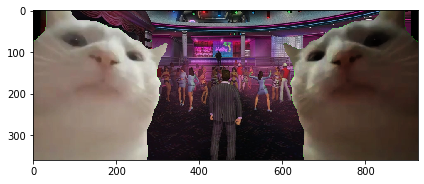

In [11]:
io.imshow(images_list3[0])

**In this part in addition the previous part, I implement the histogram matching with using each channel average values of histograms of cat frames as a source image and each channel of histograms  background image as a target image**

In [12]:
#part4
def cdf(img):
    hist,bins = np.histogram(img.flatten(),256,[0,256]) 
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf.max()
    return cdf_normalized
def cdf_hist(hist):
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf.max()
    return cdf_normalized
path="/content/drive/My Drive/HW1_vision/cat"
cat_images=glob.glob(path+"/*.png")
background = cv2.imread("/content/drive/My Drive/HW1_vision/Malibu.jpg")
background_height = background.shape[0] 
background_width = background.shape[1] 
ratio = 360/background_height
background=cv2.resize(background,(int(background_width*ratio),360))
image2=background.copy()
r2=image2[...,0]
g2=image2[...,1]
b2=image2[...,2]

cdf_r2=cdf(r2)
cdf_g2 = cdf(g2)
cdf_b2 = cdf(b2)

histr_average=np.zeros((256))
histg_average=np.zeros((256))
histb_average=np.zeros((256))

for i in range (len(cat_images)):
  path2=path+ "/cat_{}.png".format(i)
  image = cv2.imread(path2)
  image_g_channel = image [ : , : , 1 ]
  image_r_channel = image [ : , : , 0 ]
  foreground = np.logical_or(image_g_channel < 180, image_r_channel > 150)   
  nonzero_x , nonzero_y = np.nonzero(foreground)
  nonzero_cat_values = image[nonzero_x, nonzero_y, : ]
  new_frame = background.copy()  
  new_frame[ nonzero_x , nonzero_y , : ] = nonzero_cat_values
  r=nonzero_cat_values[...,0]
  g=nonzero_cat_values[...,1]
  b=nonzero_cat_values[...,2] 

  hist_r,bins = np.histogram(r.flatten(),256,[0,256]) 
  hist_g,bins = np.histogram(g.flatten(),256,[0,256]) 
  hist_b,bins = np.histogram(b.flatten(),256,[0,256]) 

  histr_average+=hist_r
  histg_average+=hist_g
  histb_average+=hist_b

histr_average/=len(cat_images)
histg_average/=len(cat_images)
histb_average/=len(cat_images)

cdfr_average=cdf_hist(histr_average)
cdfg_average=cdf_hist(histg_average)
cdfb_average=cdf_hist(histb_average)

images_list4=[]
lut=np.zeros((256,1))
lut2=np.zeros((256,1))
lut3=np.zeros((256,1))
gj=0
for gi in range(256):
    while cdf_r2[gj]<cdfr_average[gi] and gj<255:
        gj+=1
    lut[gi]=gj
gj=0
for gi in range(256):
    while cdf_g2[gj]<cdfg_average[gi] and gj<255:
        gj+=1
    lut2[gi]=gj
gj=0
for gi in range(256):
    while cdf_b2[gj]<cdfb_average[gi] and gj<255:
        gj+=1
    lut3[gi]=gj

for i in range (len(cat_images)):
    path2=path+ "/cat_{}.png".format(i)
    image = cv2.imread(path2)
    image_g_channel = image [ : , : , 1 ]
    image_r_channel = image [ : , : , 0 ]
    foreground = np.logical_or(image_g_channel < 180, image_r_channel > 150)   
    nonzero_x , nonzero_y = np.nonzero(foreground)
    nonzero_cat_values = image[nonzero_x, nonzero_y, : ]
    new_frame = background.copy()  
    new_frame[ nonzero_x , nonzero_y , : ] = nonzero_cat_values
    
    r1= np.uint8(lut[nonzero_cat_values[...,0]]).reshape((nonzero_cat_values.shape[0],1))
    g1= np.uint8(lut2[nonzero_cat_values[...,1]]).reshape((nonzero_cat_values.shape[0],1))
    b1= np.uint8(lut3[nonzero_cat_values[...,2]]).reshape((nonzero_cat_values.shape[0],1))
    cnc=np.concatenate((r1,g1,b1),axis=1)
    width=new_frame.shape[1]-1
    nonzero_y2= width-nonzero_y

    new_frame[ nonzero_x , nonzero_y2 , : ] = cnc
    new_frame = new_frame[: ,: ,[2 ,1 ,0]]
   
    images_list4.append(new_frame)
clip = mpy.ImageSequenceClip(images_list4 , fps = 25)
audio = mpy.AudioFileClip("/content/drive/My Drive/HW1_vision/selfcontrol_part.wav").set_duration(clip.duration )
clip = clip.set_audio(audioclip=audio) 
clip.write_videofile("/content/drive/My Drive/HW1_vision/part4_video.mp4" , codec="libx264")




[MoviePy] >>>> Building video /content/drive/My Drive/HW1_vision/part4_video.mp4
[MoviePy] Writing audio in part4_videoTEMP_MPY_wvf_snd.mp3


100%|██████████| 159/159 [00:00<00:00, 682.93it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/drive/My Drive/HW1_vision/part4_video.mp4



100%|██████████| 181/181 [00:05<00:00, 34.25it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/HW1_vision/part4_video.mp4 



**First frame of output shown below**

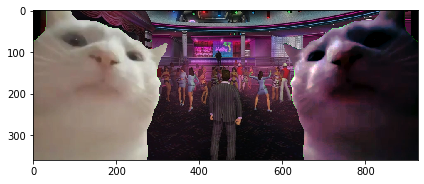

In [13]:
io.imshow(images_list4[0])

**In this part, I implement the histogram matching both left and rigth cat frames. For left cat, source image is cat frame and target image noisy cat frame. For right  cat, source image is cat frame and target image noisy background image. Adding noise to the frames, the values of constant depend on my considiration. The values may change. **

In [14]:
#part5
def add_noise(img):
  img_new=img.copy()/255
  noise =  np.random.normal(loc=0, scale=1, size=img.shape)
  noisy = np.clip((img_new + noise),0,1)
  noisy*=255
  return np.uint8(noisy)
def add_noise_hist_c(hist,k):
  noise =  np.random.randint(0,k, size=hist.shape)
  noisy = np.uint8(np.clip((hist + noise*2),0,10*hist.max()))
  return np.uint8(noisy)

def add_noise_hist_t(hist,k):
  noise =  np.random.randint(0,k, size=hist.shape)
  noisy = np.uint8(np.clip((hist + noise),0,10*hist.max()))
  return np.uint8(noisy)

path="/content/drive/My Drive/HW1_vision/cat"
cat_images=glob.glob(path+"/*.png")
background = cv2.imread("/content/drive/My Drive/HW1_vision/Malibu.jpg")
background_height = background.shape[0] 
background_width = background.shape[1] 
ratio = 360/background_height
background=cv2.resize(background,(int(background_width*ratio),360))


images_list5=[]
for i in range (len(cat_images)):
    path2=path+ "/cat_{}.png".format(i)
    image = cv2.imread(path2)
    new_frame=background.copy()
    target =background.copy()
    image_g_channel = image [ : , : , 1 ]
    image_r_channel = image [ : , : , 0 ]
    foreground = np.logical_or(image_g_channel < 180, image_r_channel > 150)   
    nonzero_x , nonzero_y = np.nonzero(foreground)
    nonzero_cat_values = image[nonzero_x, nonzero_y, : ]
    cat_hist_r,cat_bins_r = np.histogram(nonzero_cat_values[...,0].flatten(),256,[0,256])
    cat_hist_g,cat_bins_g = np.histogram(nonzero_cat_values[...,1].flatten(),256,[0,256]) 
    cat_hist_b,cat_bins_b = np.histogram(nonzero_cat_values[...,2].flatten(),256,[0,256])

    target_hist_r,target_bins_r = np.histogram(target[...,0].flatten(),256,[0,256])
    target_hist_g,target_bins_g = np.histogram(target[...,1].flatten(),256,[0,256])
    target_hist_b,target_bins_b = np.histogram(target[...,2].flatten(),256,[0,256])


    noise_cat_r=add_noise(nonzero_cat_values[...,0])
    noise_cat_g=add_noise(nonzero_cat_values[...,1])
    noise_cat_b=add_noise(nonzero_cat_values[...,2])
    noise_target_r=add_noise(target[...,0])
    noise_target_g=add_noise(target[...,1])
    noise_target_b=add_noise(target[...,2])

    # noise_cat_hist_r,noise_cat_bins_r = np.histogram(noise_cat_r.flatten(),256,[0,256])
    # noise_cat_hist_g,noise_cat_bins_g = np.histogram(noise_cat_g.flatten(),256,[0,256])
    # noise_cat_hist_b,noise_cat_bins_b = np.histogram(noise_cat_b.flatten(),256,[0,256])
    scalar1=0
    scalar2=0
    scalar3=0
    if i%3==0:
      scalar1,scalar2,scalar3=250,20,10
    elif i%3==1:
     scalar1,scalar2,scalar3=20,250,10
    elif i%3==2:
      scalar1,scalar2,scalar3=10,10,250
    noise_cat_hist_r = add_noise_hist_c(cat_hist_r,scalar1)
    noise_cat_hist_g = add_noise_hist_c(cat_hist_g,scalar2)
    noise_cat_hist_b = add_noise_hist_c(cat_hist_b,scalar3)

    noise_target_hist_r,noise_target_bins_r = np.histogram(noise_target_r.flatten(),256,[0,256])
    noise_target_hist_g,noise_target_bins_g = np.histogram(noise_target_g.flatten(),256,[0,256])
    noise_target_hist_b,noise_target_bins_b = np.histogram(noise_target_b.flatten(),256,[0,256])
    # if i%3==0:
    #   scalar1,scalar2,scalar3=50,10,5
    # elif i%3==1:
    #  scalar1,scalar2,scalar3=10,50,5
    # elif i%3==2:
    #   scalar1,scalar2,scalar3=5,10,50
    # noise_target_hist_r = add_noise_hist_t(noise_target_r,scalar1)
    # noise_target_hist_g = add_noise_hist_t(noise_target_g,scalar2)
    # noise_target_hist_b =  add_noise_hist_t(noise_target_b,scalar3)

    cat_r_cdf=cdf_hist(cat_hist_r)
    cat_g_cdf=cdf_hist(cat_hist_g)
    cat_b_cdf=cdf_hist(cat_hist_b)
    noise_cat_r_cdf=cdf_hist(noise_cat_hist_r)
    noise_cat_g_cdf=cdf_hist(noise_cat_hist_g)
    noise_cat_b_cdf=cdf_hist(noise_cat_hist_b)

    lut=np.zeros((256,1))
    lut2=np.zeros((256,1))
    lut3=np.zeros((256,1))
    gj=0
    for gi in range(256):
        while noise_cat_r_cdf[gj]<cat_r_cdf[gi] and gj<255:
            gj+=1
        lut[gi]=gj
    gj=0
    for gi in range(256):
        while noise_cat_g_cdf[gj]<cat_g_cdf[gi] and gj<255:
            gj+=1
        lut2[gi]=gj
    gj=0
    for gi in range(256):
        while noise_cat_b_cdf[gj]<cat_b_cdf[gi] and gj<255:
            gj+=1
        lut3[gi]=gj

    r1= np.uint8(lut[nonzero_cat_values[...,0]]).reshape((nonzero_cat_values.shape[0],1))
    g1= np.uint8(lut2[nonzero_cat_values[...,1]]).reshape((nonzero_cat_values.shape[0],1))
    b1= np.uint8(lut3[nonzero_cat_values[...,2]]).reshape((nonzero_cat_values.shape[0],1))
    cnc=np.concatenate((r1,g1,b1),axis=1)
    new_frame[ nonzero_x , nonzero_y , : ] = cnc


    noise_target_r_cdf=cdf_hist(noise_target_hist_r)
    noise_target_g_cdf=cdf_hist(noise_target_hist_g)
    noise_target_b_cdf=cdf_hist(noise_target_hist_b)
    lut=np.zeros((256,1))
    lut2=np.zeros((256,1))
    lut3=np.zeros((256,1))
    gj=0
    for gi in range(256):
        while noise_target_r_cdf[gj]<cat_r_cdf[gi] and gj<255:
            gj+=1
        lut[gi]=gj
    gj=0
    for gi in range(256):
        while noise_target_g_cdf[gj]<cat_g_cdf[gi] and gj<255:
            gj+=1
        lut2[gi]=gj
    gj=0
    for gi in range(256):
        while noise_target_b_cdf[gj]<cat_b_cdf[gi] and gj<255:
            gj+=1
        lut3[gi]=gj
    r1= np.uint8(lut[nonzero_cat_values[...,0]]).reshape((nonzero_cat_values.shape[0],1))
    g1= np.uint8(lut2[nonzero_cat_values[...,1]]).reshape((nonzero_cat_values.shape[0],1))
    b1= np.uint8(lut3[nonzero_cat_values[...,2]]).reshape((nonzero_cat_values.shape[0],1))
    cnc=np.concatenate((r1,g1,b1),axis=1)

    width=new_frame.shape[1]-1
    nonzero_y2= width-nonzero_y

    new_frame[ nonzero_x , nonzero_y2 , : ] = cnc
    new_frame = new_frame[: ,: ,[2 ,1 ,0]]
   
    images_list5.append(new_frame)
clip = mpy.ImageSequenceClip(images_list5 , fps = 25)
audio = mpy.AudioFileClip("/content/drive/My Drive/HW1_vision/selfcontrol_part.wav").set_duration(clip.duration )
clip = clip.set_audio(audioclip=audio) 
clip.write_videofile("/content/drive/My Drive/HW1_vision/part5_video.mp4" , codec="libx264")



[MoviePy] >>>> Building video /content/drive/My Drive/HW1_vision/part5_video.mp4
[MoviePy] Writing audio in part5_videoTEMP_MPY_wvf_snd.mp3


100%|██████████| 159/159 [00:00<00:00, 646.42it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/drive/My Drive/HW1_vision/part5_video.mp4



100%|██████████| 181/181 [00:05<00:00, 30.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/HW1_vision/part5_video.mp4 



**First frame of output shown below**

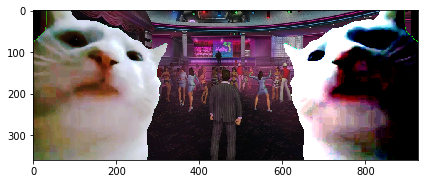

In [15]:
io.imshow(images_list5[0])